In [1]:
import os
import skimage
import model as modellib
from config import Config

PART_INDEX = {'blouse': [0, 1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14],
              'outwear': [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
              'dress': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 17, 18],
              'skirt': [15, 16, 17, 18],
              'trousers': [15, 16, 19, 20, 21, 22, 23]}
PART_STR = ['neckline_left', 'neckline_right',
            'center_front',
            'shoulder_left', 'shoulder_right',
            'armpit_left', 'armpit_right',
            'waistline_left', 'waistline_right',
            'cuff_left_in', 'cuff_left_out',
            'cuff_right_in', 'cuff_right_out',
            'top_hem_left', 'top_hem_right',
            'waistband_left', 'waistband_right',
            'hemline_left', 'hemline_right',
            'crotch',
            'bottom_left_in', 'bottom_left_out',
            'bottom_right_in', 'bottom_right_out']
IMAGE_CATEGORY = ['blouse', 'outwear', 'dress', 'skirt', 'trousers'][0]


class FIConfig(Config):
    """
    Configuration for training on the toy shapes dataset.
    Derives from the base Config class and overrides values specific
    to the toy shapes dataset.
    """
    # Give the configuration a recognizable name
    NAME = "FI"

    # Train on 1 GPU and 8 images per GPU. We can put multiple images on each
    # GPU because the images are small. Batch size is 8 (GPUs * images/GPU).
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_KEYPOINTS = len(PART_INDEX[IMAGE_CATEGORY])  # 更改当前训练关键点数目
    KEYPOINT_MASK_SHAPE = [56, 56]

    # Number of classes (including background)
    NUM_CLASSES = 1 + 1

    RPN_TRAIN_ANCHORS_PER_IMAGE = 100
    VALIDATION_STPES = 100
    STEPS_PER_EPOCH = 1000
    MINI_MASK_SHAPE = (56, 56)
    KEYPOINT_MASK_POOL_SIZE = 7

    # Pooled ROIs
    POOL_SIZE = 7
    MASK_POOL_SIZE = 14
    MASK_SHAPE = [28, 28]
    WEIGHT_LOSS = True
    KEYPOINT_THRESHOLD = 0.005

inference_config = FIConfig()

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir='./logs')

# Get path to saved weights
print(model.find_last())
model.load_weights(model.find_last()[1], by_name=True)

C:\software\Anaconda\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


('./logs\\fi20181214T1609', './logs\\fi20181214T1609\\mask_rcnn_fi_0168.h5')


In [2]:
image = skimage.io.imread(r'E:\天池数据\keypoint_data\Images\blouse\c28547fcca54c1b9480edcced9f48bf9.jpg')
res = model.detect_keypoint([image], verbose=1)

Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000
image_metas              shape: (1, 10)               min:    0.00000  max:  912.00000
windows                  shape: (1, 4)                min:  112.00000  max:  912.00000


C:\software\Anaconda\lib\site-packages\scipy\misc\pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if issubdtype(ts, int):
C:\software\Anaconda\lib\site-packages\scipy\misc\pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


rpn_class                shape: (1, 261888, 2)        min:    0.00000  max:    1.00000
rpn_bbox                 shape: (1, 261888, 4)        min:   -5.18386  max:  183.68770
rois                     shape: (1, 1000, 4)          min:    0.00000  max:    1.00000
mrcnn_class              shape: (1, 1000, 2)          min:    0.00000  max:    1.00000
mrcnn_bbox               shape: (1, 1000, 2, 4)       min:   -4.00625  max:    4.21413
detections               shape: (1, 100, 6)           min:    0.00000  max:  844.00000
mrcnn_mask               shape: (1, 100, 28, 28, 2)   min:    0.23678  max:    0.93306
mrcnn_keypoint_prob      shape: (1, 100, 13, 3136)    min:    0.00000  max:    0.06552


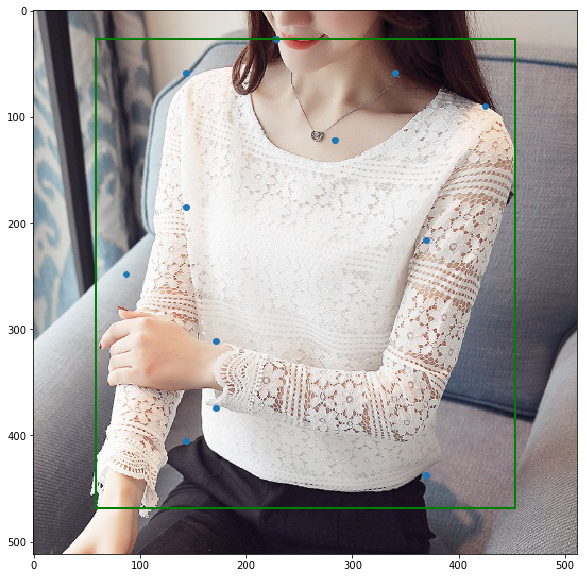

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

kp = res[0]["keypoints"]
bb = res[0]["rois"]

plt.figure(figsize=[10, 10])
plt.imshow(image)
plt.scatter(kp[0, :, 0], kp[0, :, 1])

currentAxis=plt.gca()
rect=patches.Rectangle((bb[0, 1], bb[0, 0]),
                       bb[0, 3] - bb[0, 1],
                       bb[0, 2] - bb[0, 0],
                       linewidth=2, edgecolor='G',facecolor='none')
currentAxis.add_patch(rect)

rois                     shape: (1, 4)                min:   27.00000  max:  468.00000
keypoints                shape: (1, 13, 3)            min:    1.00000  max:  437.00000
class_ids                shape: (1,)                  min:    1.00000  max:    1.00000
keypoints                shape: (1, 13, 3)            min:    1.00000  max:  437.00000
masks                    shape: (512, 512, 1)         min:    0.00000  max:    1.00000
scores                   shape: (1,)                  min:    0.99495  max:    0.99495
keypoint_shape: (1, 13, 3)


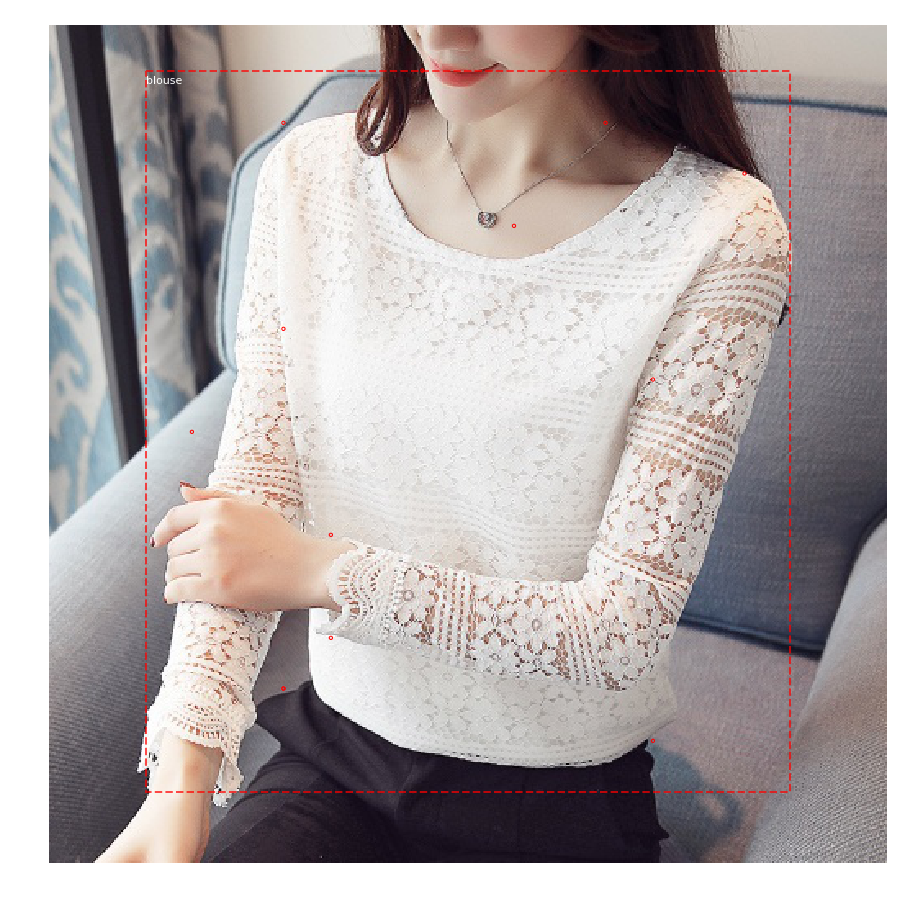

In [4]:
import visualize
from model import log

class_names = ['BG', 'blouse']
r = res[0] # for one image

log("rois",r['rois'])
log("keypoints",r['keypoints'])
log("class_ids",r['class_ids'])
log("keypoints",r['keypoints'])
log("masks",r['masks'])
log("scores",r['scores'])

visualize.display_keypoints(image,r['rois'],r['keypoints'],r['class_ids'],class_names,skeleton = [])